In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [427]:
df = pd.read_csv(r'C:\Users\Odafaz\Desktop\Daft Project\listing.csv')
pd.set_option('display.max_colwidth', None)

# Questions about the data

- Are there any obvious patterns or anomalies?
- How many rows and columns does the dataset have?
- What are the data types of the columns? Are they appropriate for the intended analysis?
- Are there any missing values in the dataset? If so, how prevalent are they and how should they be handled?
- Are there any duplicated records in the dataset?
- Are there any outliers or extreme values that need to be addressed?

In [428]:
df.head()

,daft_id,date_entered,views,type,rent,num_bedroom,num_bathroom,available_from,furnished,lease,ber_rating,address,distance_from_city_centre,latitude,longitude,region,url,input_date,property_id
0,25306100,05/07/2023,"3,138",House,5500,3,3,"Sep 1st, 2023",Yes,Minimum 3 Months,B1,"1 Lucan Road, Dublin 20, Dublin 20",5.250206,53.347949,-6.345977,Dublin 20,https://www.daft.ie/for-rent/house-1-lucan-road-dublin-20-dublin-20/5306100,06/07/2023,2eea2728508e598edcf0a95b20ca891a4d4c9e7e202b7279f131fc5104ab4626
1,216819617,03/07/2023,692,Apartment,13600,7,7,Immediately,Yes,No Minimum,B1,"7 Apartments - 53 Grove Park, Rathmines",1.805450,53.329222,-6.268150,Rathmines,https://www.daft.ie/for-rent/apartment-7-apartments-53-grove-park-rathmines/5322906,06/07/2023,86181031521f3c821f9495257b721988c827bd01afc8ec14862d509bed8b6d3d
2,25328430,04/07/2023,835,Apartment,3683.333333,2,1,Immediately,Yes,No Minimum,A1,"Cows Lane, Temple Bar, Dublin City Centre",0.172660,53.344265,-6.268956,Dublin City Centre,https://www.daft.ie/for-rent/apartment-cows-lane-temple-bar-dublin-city-centre/5328430,06/07/2023,7964f287459a2d66953a5225e739c99c6552c30c50b915bc5d465f94f78befc5
3,25315011,29/06/2023,"2,758",House,3650,3,3,Immediately,Yes,Minimum 6 Months,A2,"1 Mercer Green, Dublin 18, Carrickmines, Dublin 18",13.107704,53.246991,-6.159338,Dublin 18,https://www.daft.ie/for-rent/house-1-mercer-green-dublin-18-carrickmines-dublin-18/5315011,06/07/2023,d200ee2ac3f16be3e0745c138e8ba46e18ce8760efc7bec68454fe9447a4a58c
4,216705866,05/07/2023,541,Apartment,28300,13,10,Immediately,Yes,No Minimum,D2,"7 Apartments - 58/59 Abbey Street Middle, Dublin 1",0.455917,53.348011,-6.261931,Dublin 1,https://www.daft.ie/for-rent/apartment-7-apartments-58-59-abbey-street-middle-dublin-1/5311082,06/07/2023,7bf5c80b2f4af9570f4d3bc9fcd0894e1fbb199e7a01941b953cf7bb936406e5


In [429]:
df.shape

(808, 19)

In [430]:
df.dtypes

daft_id                        int64
date_entered                  object
views                         object
type                          object
rent                          object
num_bedroom                    int64
num_bathroom                   int64
available_from                object
furnished                     object
lease                         object
ber_rating                    object
address                       object
distance_from_city_centre    float64
latitude                     float64
longitude                    float64
region                        object
url                           object
input_date                    object
property_id                   object
dtype: object

## Data type conversion:

- dates -> datetime64 
- views, num_bedroom and num_bathroom -> int32
- rent, latitude, longitude and distance_from_city_centre -> float64

In [431]:
df['date_entered'] = pd.to_datetime(df['date_entered'], format ='%d/%m/%Y')
df['input_date'] = pd.to_datetime(df['input_date'], format ='%d/%m/%Y')
df['views'] = df['views'].str.replace(',', '').astype(int)
df['rent'] = pd.to_numeric(df['rent'].astype(str).str.replace(',', ''), errors='coerce')
df['num_bedroom']= df['num_bedroom'].astype(int)
df['num_bathroom']= df['num_bathroom'].astype(int)

In [432]:
df.dtypes

daft_id                               int64
date_entered                 datetime64[ns]
views                                 int32
type                                 object
rent                                float64
num_bedroom                           int32
num_bathroom                          int32
available_from                       object
furnished                            object
lease                                object
ber_rating                           object
address                              object
distance_from_city_centre           float64
latitude                            float64
longitude                           float64
region                               object
url                                  object
input_date                   datetime64[ns]
property_id                          object
dtype: object

In [433]:
df.isna().sum()

daft_id                       0
date_entered                  0
views                         0
type                          0
rent                          1
num_bedroom                   0
num_bathroom                  0
available_from                1
furnished                     1
lease                         1
ber_rating                   55
address                       0
distance_from_city_centre     0
latitude                      0
longitude                     0
region                        0
url                           0
input_date                    0
property_id                   0
dtype: int64

## Understanding NaN values

- Rows with NaN Rent Values are not useful for this rent price analysis and probably is a result of landlord/property agency misfilling daft.ie listing form. Therefore, will be excluded from the dataset
- Rows with NaN BER Rating are expected as this is not a mandatory field. Therefore, I will NOT exclude them.

In [434]:
df_rent_nan = df[pd.isna(df['rent'])]
df_rent_nan.head()

,daft_id,date_entered,views,type,rent,num_bedroom,num_bathroom,available_from,furnished,lease,ber_rating,address,distance_from_city_centre,latitude,longitude,region,url,input_date,property_id
171,913040973,2023-04-26,2105,Apartments,NaN,0,0,NaN,NaN,NaN,NaN,"Botanic Avenue Student Accommodation, 52 Botanic Avenue, Drumcondra, Drumcondra, Dublin 3",2.607191,53.368338,-6.259015,Dublin 3,https://www.daft.ie/for-rent/botanic-avenue-student-accommodation-52-botanic-avenue-drumcondra-drumcondra-dublin-3/4012633,2023-07-06,f69daefd344c84d77f6b1faf800f7a977d8a83c6c3f5e8f2cca95a38e8930a1a


In [435]:
df_ber_rating_nan = df[pd.isna(df['ber_rating'])]
df_ber_rating_nan.head()

,daft_id,date_entered,views,type,rent,num_bedroom,num_bathroom,available_from,furnished,lease,ber_rating,address,distance_from_city_centre,latitude,longitude,region,url,input_date,property_id
89,216250919,2023-07-06,6642,House,2100.0,3,1,Immediately,No,No Minimum,NaN,"Wheatfield Drive, Clondalkin, Dublin 22",8.345406,53.343446,-6.392514,Dublin 22,https://www.daft.ie/for-rent/house-wheatfield-drive-clondalkin-dublin-22/4737946,2023-07-06,737a9bb29b8850dbce4b55864b9fb3b34c710a164a754236c91cb27a6e085802
93,216472031,2023-07-06,7233,House,2074.0,3,1,Immediately,No,No Minimum,NaN,"Errigal Road, Drimnagh, Dublin 12",4.268345,53.327143,-6.323572,Dublin 12,https://www.daft.ie/for-rent/house-errigal-road-drimnagh-dublin-12/5286108,2023-07-06,cadf2550c578020708a7c67e59d8d546c61bc0220265932a85cbe1e3eb8da73b
94,216759135,2023-07-06,11148,Apartment,1000.0,1,1,Immediately,No,No Minimum,NaN,"Wellmount Green, Finglas, Dublin 11",5.222772,53.385023,-6.309387,Dublin 11,https://www.daft.ie/for-rent/apartment-wellmount-green-finglas-dublin-11/5316077,2023-07-06,26cc2d30dd96bc79e1878b3c150a234831895dc0ad203bbd1d6f19486a358e5f
95,216093519,2023-07-06,14731,House,1700.0,2,1,Immediately,No,No Minimum,NaN,"Downpatrick Road, Crumlin, Dublin 12",3.064368,53.326160,-6.300103,Dublin 12,https://www.daft.ie/for-rent/house-downpatrick-road-crumlin-dublin-12/4718424,2023-07-06,b095c7a1158b0ddedd97f2fcd5544d56a4d119a93b3156fe99443b515a6c7653
96,215871416,2023-07-06,4649,House,2400.0,3,1,Immediately,No,No Minimum,NaN,"Raheen Drive, Ballyfernot, Ballyfermot, Dublin 10",6.111168,53.336164,-6.357687,Dublin 10,https://www.daft.ie/for-rent/house-raheen-drive-ballyfernot-ballyfermot-dublin-10/4690628,2023-07-06,4c851ddb7470524b8fc4db3571db90bfe9362bd814f239f5e80bcfec703bb0b6


In [436]:
# Drop rows where rent is NaN

df = df.dropna(subset=['rent'])

# Anomalies

- Some regions are wrong because the extraction of region column is based on address.
    - Whatever comes after the last comma is being considered as region. However, some addresses don't specify in which dublin region the property is located. Therefore, will consider only the one's that explicity specifies it


    

In [437]:
list_uniques = ['type','furnished','ber_rating','region']
for item in list_uniques:
    print(f'{item}: \n{df[item].unique()}')

type: 
['House' 'Apartment' 'Studio']
furnished: 
[' Yes' ' No' ' Optional']
ber_rating: 
['B1' 'A1' 'A2' 'D2' 'BER Exempt' 'C3' 'E1' 'B2' 'D1' 'B3' 'C1' 'C2' 'A3'
 nan 'F' 'E2' 'G']
region: 
[' Dublin 20' ' Rathmines' ' Dublin City Centre' ' Dublin 18' ' Dublin 1'
 ' Dublin 8' ' Dublin 6' ' Co. Dublin' ' Dublin 4' ' Dublin 14'
 ' Dublin 2' ' Dublin 13' ' Dublin 9' ' Dublin 7' ' Dublin 5' ' Dublin 3'
 ' Dublin 12' ' Dublin 15' ' Raheny' ' Dublin 11' ' Dublin 22'
 ' Hansfield' ' Dublin 10' ' Finglas' ' Drumcondra' ' Dublin 24'
 ' Clondalkin' ' Terenure' ' Dublin 6W' ' Ranelagh' ' Ongar Village'
 ' Dublin 17' 'Leinster Road' 'Capel Street' ' 138 Rathgar Road'
 ' Castleknock' 'Wyckham Point' 'Grove Park' ' Dublin 16'
 ' 11 Frankfort Avenue' ' 96 Kimmage Road Lower' ' 29 Howth Road'
 'Grosvenor Lane' ' Rathgar' ' Beaumont Woods' ' Mulhuddart'
 ' Collinswood' '54 Leeson Park' ' Millbrook Lawns' ' Bushy Park House'
 ' 60 Rathmines Road Upper' ' Ballsbridge' ' Cherry Orchard' ' Sandyford'
 'G

In [438]:
# Ignoring regions that don't have 'Dublin +(num)' in Address.
df['region'] = df['region'].str.extract(r'(Dublin \d+)', expand=False)
print(df['region'].unique())

['Dublin 20' nan 'Dublin 18' 'Dublin 1' 'Dublin 8' 'Dublin 6' 'Dublin 4'
 'Dublin 14' 'Dublin 2' 'Dublin 13' 'Dublin 9' 'Dublin 7' 'Dublin 5'
 'Dublin 3' 'Dublin 12' 'Dublin 15' 'Dublin 11' 'Dublin 22' 'Dublin 10'
 'Dublin 24' 'Dublin 17' 'Dublin 16']


# Outliers


In [439]:
df.describe()[['rent','num_bedroom', 'num_bathroom','distance_from_city_centre']]

,rent,num_bedroom,num_bathroom,distance_from_city_centre
count,807.000000,807.00000,807.000000,807.000000
mean,3001.555969,2.04461,1.607187,5.586085
std,2586.742275,1.32470,1.174839,4.680827
min,900.000000,0.00000,0.000000,0.165881
25%,1890.500000,1.00000,1.000000,2.076316
50%,2426.000000,2.00000,1.000000,3.584084
75%,3200.000000,3.00000,2.000000,8.720837
max,30000.000000,13.00000,11.000000,30.067830


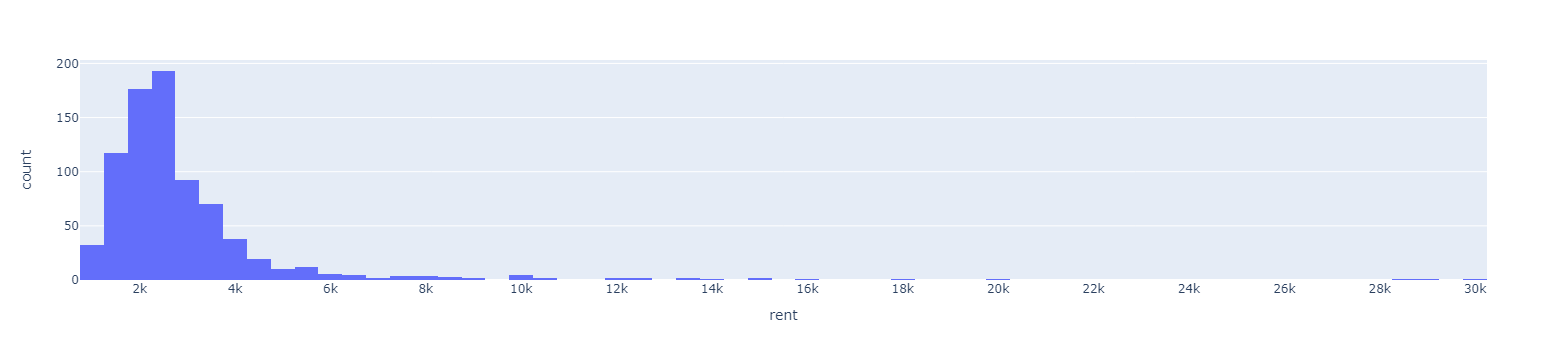

In [440]:
fig = px.histogram(df, x='rent')
fig.update_xaxes(dtick=2000)

fig.show()

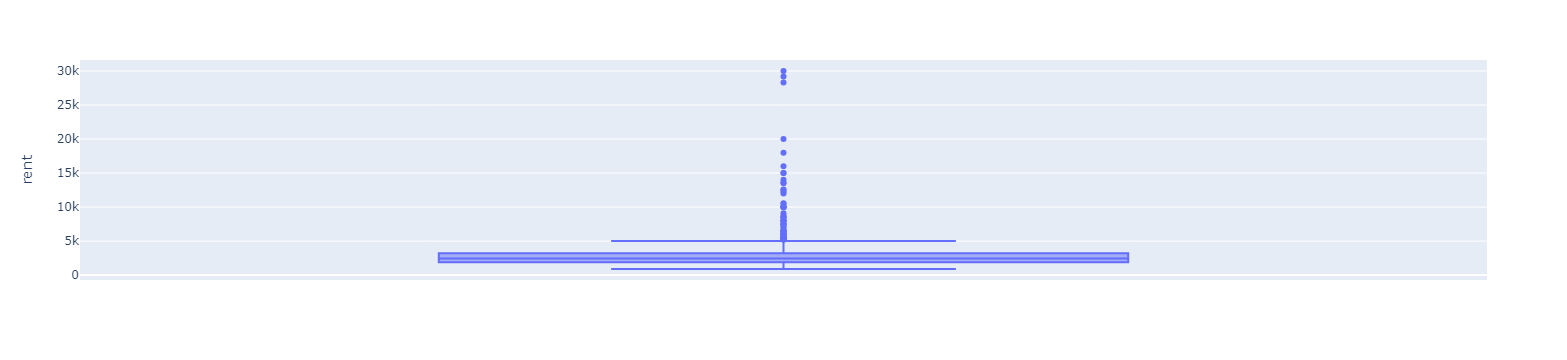

In [441]:
fig = px.box(df, y='rent')

fig.show()

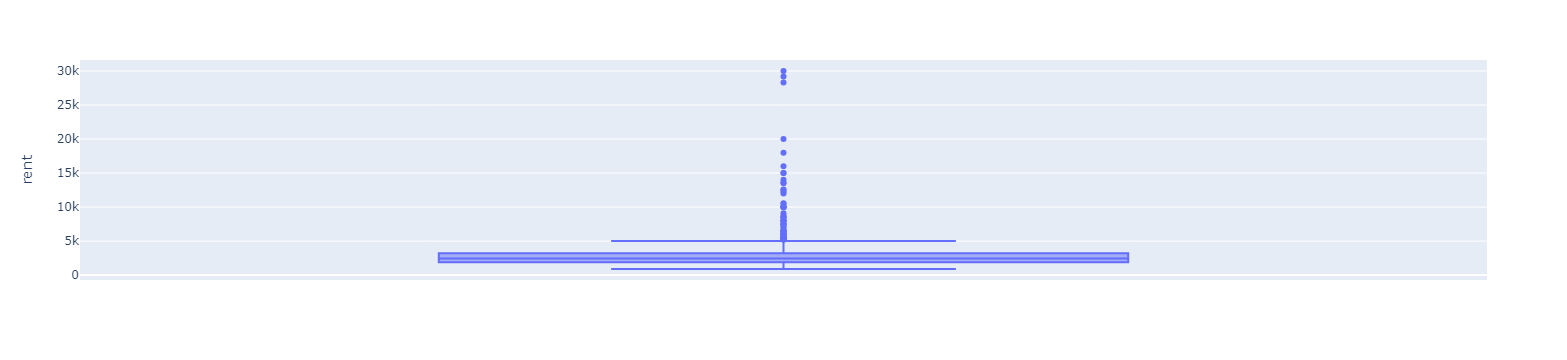

In [442]:
fig = px.box(df, y='rent')

fig.show()



In [443]:
def find_outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3 - q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['rent'])

print('Number of Outliers: '+ str(len(outliers)))
print('Max Outlier Value: '+ str(outliers.max()))
print('Min Outlier Value: '+ str(outliers.min()))


number of outliers: 61
max outlier value: 30000.0
min outlier value: 5190.0


In [444]:
df_outliers = df[df['rent'] >= outliers.min()].sort_values(by='rent')
df = df.drop(df_outliers.index)
df.shape

(746, 19)

In [445]:
df.describe()[['rent','num_bedroom', 'num_bathroom','distance_from_city_centre']]

,rent,num_bedroom,num_bathroom,distance_from_city_centre
count,746.000000,746.000000,746.000000,746.000000
mean,2453.531725,1.865952,1.423592,5.652079
std,839.076588,1.032749,0.853060,4.738779
min,900.000000,0.000000,0.000000,0.165881
25%,1846.250000,1.000000,1.000000,2.025116
50%,2380.666667,2.000000,1.000000,3.710035
75%,2953.750000,2.000000,2.000000,8.918340
max,5000.000000,5.000000,5.000000,30.067830


# Correlation

- Bedroom and Bathroom have very high correlation with Rent prices, which makes a lot of sense.
- Distance From City Center has negative correlation, which makes sense as property prices tend to decrease the further you are from the city centre
- Distance From City Center has a considerable positive correlation with number of bedroom and bathrooms. The further away from the city center, the bigger the properties tend to be.

In [449]:
correlation = df[['rent','num_bedroom', 'num_bathroom','distance_from_city_centre']].corr(numeric_only=True)
correlation 

,rent,num_bedroom,num_bathroom,distance_from_city_centre
rent,1.000000,0.663569,0.635249,-0.017937
num_bedroom,0.663569,1.000000,0.736444,0.265639
num_bathroom,0.635249,0.736444,1.000000,0.277171
distance_from_city_centre,-0.017937,0.265639,0.277171,1.000000


In [447]:
df.to_csv(r'C:\Users\Odafaz\Desktop\Daft Project\daft_listing_final.csv', encoding ='utf-8')